In [73]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [74]:
### 1. Выберите набор данных (датасет) для решения задачи классификации или регрессии.

In [75]:
data = pd.read_csv('Automobile.csv', sep=",")

In [76]:
data.shape

(398, 9)

In [77]:
data.dtypes

name             object
mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
model_year        int64
origin           object
dtype: object

In [78]:
data.isnull().sum()

name            0
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [79]:
### 2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.

In [80]:
data.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140,3449,10.5,70,usa


In [81]:
data["cylinders"].unique()

array([8, 4, 6, 3, 5], dtype=int64)

In [82]:
# Удаление колонкок
data.drop(columns=['name'], inplace=True)
data.drop(columns=['origin'], inplace=True)

# Перемещение колонки "cylinders" в начало датафрейма
seed_type_column = data['cylinders'] 
data.drop(columns=['cylinders'], inplace=True)
data.insert(0, 'cylinders', seed_type_column) 

data.head()

,cylinders,mpg,displacement,horsepower,weight,acceleration,model_year
0,8,18.0,307.0,130,3504,12.0,70
1,8,15.0,350.0,165,3693,11.5,70
2,8,18.0,318.0,150,3436,11.0,70
3,8,16.0,304.0,150,3433,12.0,70
4,8,17.0,302.0,140,3449,10.5,70


<Axes: >

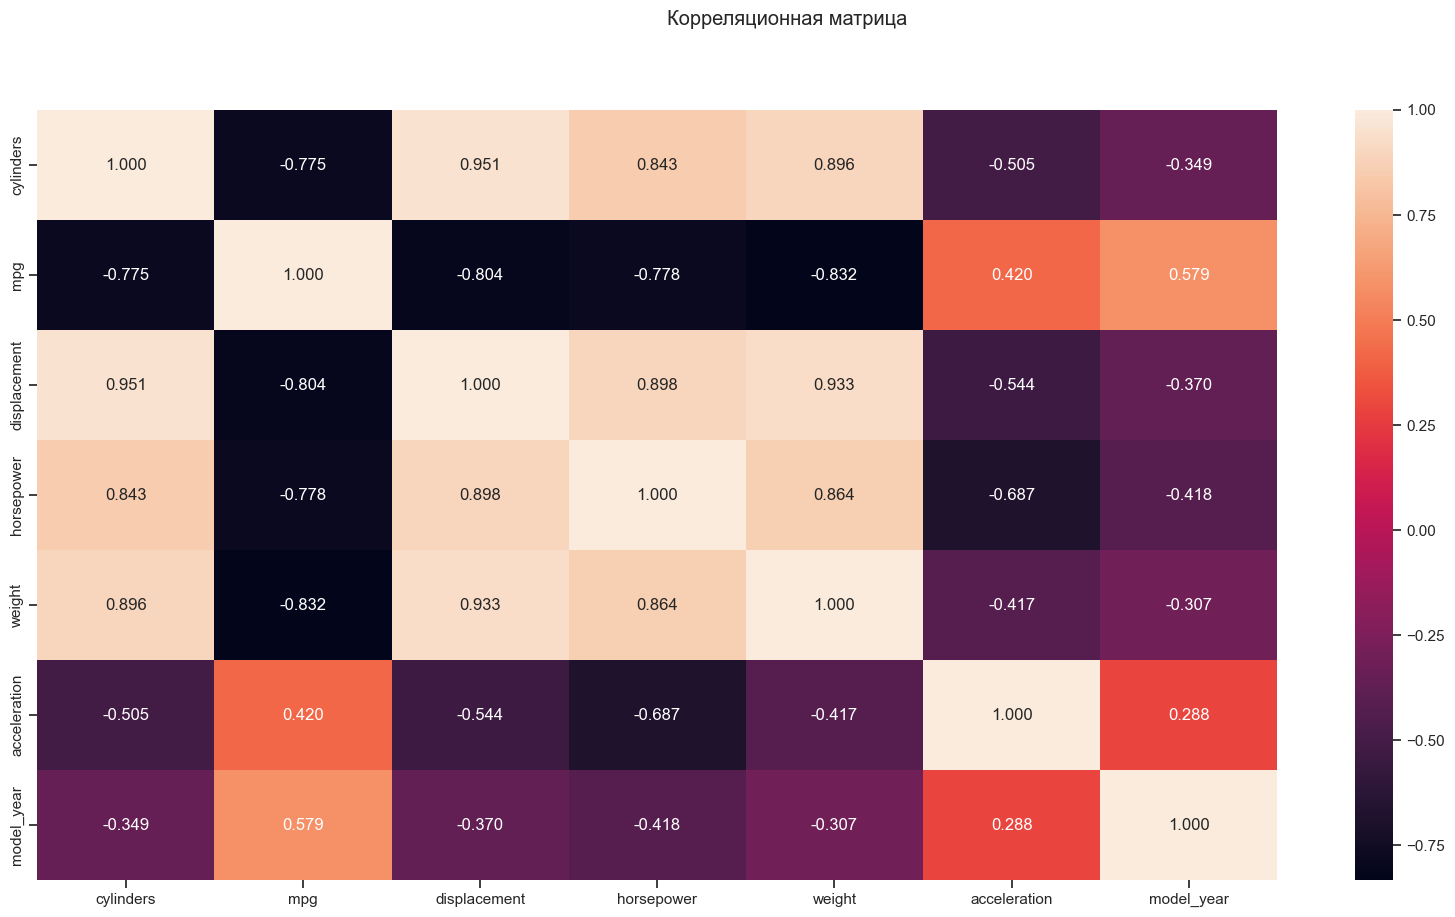

In [83]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(20,10))
fig.suptitle('Корреляционная матрица')
sns.heatmap(data.corr(), ax=ax, annot=True, fmt='.3f')

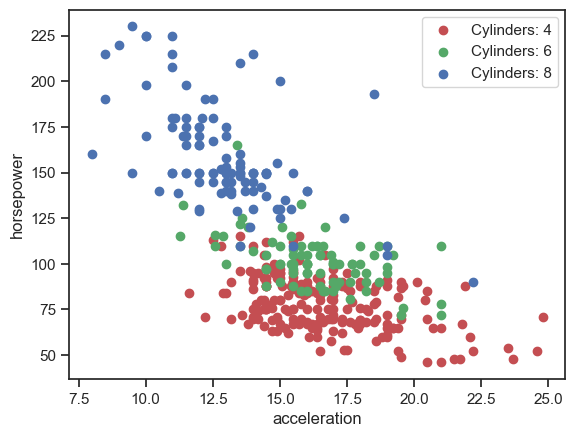

In [84]:
fig, ax = plt.subplots()

color_dict = {4: 'r', 6: 'g', 8: 'b'}

for cylinders, color in color_dict.items():
    data_class = data[data['cylinders'] == cylinders]

    ax.scatter(data_class['acceleration'], data_class['horsepower'], color=color,
                label=f'Cylinders: {cylinders}')

ax.set_xlabel('acceleration')
ax.set_ylabel('horsepower')
ax.legend()

plt.show()

In [85]:
data_x = data.copy()
data_x = data_x.drop(columns="cylinders")
data_x

,mpg,displacement,horsepower,weight,acceleration,model_year
0,18.0,307.0,130,3504,12.0,70
1,15.0,350.0,165,3693,11.5,70
2,18.0,318.0,150,3436,11.0,70
3,16.0,304.0,150,3433,12.0,70
4,17.0,302.0,140,3449,10.5,70
...,...,...,...,...,...,...
393,27.0,140.0,86,2790,15.6,82
394,44.0,97.0,52,2130,24.6,82
395,32.0,135.0,84,2295,11.6,82
396,28.0,120.0,79,2625,18.6,82


In [86]:
data_y = data["cylinders"]
data_y

0      8
1      8
2      8
3      8
4      8
      ..
393    4
394    4
395    4
396    4
397    4
Name: cylinders, Length: 398, dtype: int64

In [87]:
# Разделение выборки на обучающую и тестовую
data_X_test, data_X_train, data_Y_test, data_Y_train = train_test_split(data_x, data_y, test_size=0.2, random_state=2024)

In [88]:
# Обучение модели для произвольного гиперпараметра K=50

cl1_1 = KNeighborsClassifier(n_neighbors=50)

cl1_1.fit(data_X_train, data_Y_train)
target1_0 = cl1_1.predict(data_X_train)
target1_1 = cl1_1.predict(data_X_test)

In [89]:
# Оценка качества
accuracy_score(data_Y_train, target1_0), accuracy_score(data_Y_test, target1_1)

(0.7625, 0.7610062893081762)

In [90]:
scoring = {'precision': 'precision_weighted', 
           'recall': 'recall_weighted',
           'f1': 'f1_weighted'}

In [91]:
confusion_matrix(data_Y_test, target1_1)

array([[  0,   2,   0,   0,   0],
       [  0, 164,   0,   0,   0],
       [  0,   1,   0,   0,   1],
       [  0,  40,   0,   0,  29],
       [  0,   3,   0,   0,  78]], dtype=int64)

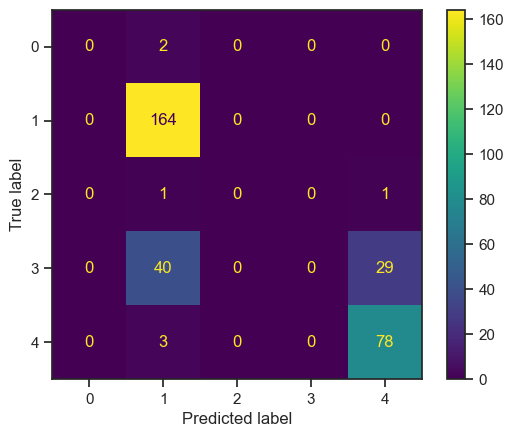

In [92]:
cm_display = ConfusionMatrixDisplay(confusion_matrix(data_Y_test, target1_1))
cm_display.plot()
plt.show()

In [93]:
# Параметры TP, TN, FP, FN считаются как сумма по всем классам
precision_score(data_Y_test, target1_1, average='micro')

0.7610062893081762

In [94]:
# Параметры TP, TN, FP, FN считаются отдельно для каждого класса 
# и берется среднее значение, дисбаланс классов не учитывается.
precision_score(data_Y_test, target1_1, average='macro')

C:\Users\Yan note\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.30063492063492064

In [95]:
classification_report(data_Y_test, target1_1, 
                      target_names=["0", "1", "2", "4", "5"], output_dict=True)

C:\Users\Yan note\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Yan note\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Yan note\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

{'0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2.0},
 '1': {'precision': 0.780952380952381,
  'recall': 1.0,
  'f1-score': 0.8770053475935828,
  'support': 164.0},
 '2': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2.0},
 '4': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 69.0},
 '5': {'precision': 0.7222222222222222,
  'recall': 0.9629629629629629,
  'f1-score': 0.8253968253968254,
  'support': 81.0},
 'accuracy': 0.7610062893081762,
 'macro avg': {'precision': 0.30063492063492064,
  'recall': 0.39259259259259255,
  'f1-score': 0.34048043459808164,
  'support': 318.0},
 'weighted avg': {'precision': 0.5867175801138065,
  'recall': 0.7610062893081762,
  'f1-score': 0.6625346536556302,
  'support': 318.0}}

In [96]:
# Кросс-валидация

scores = cross_val_score(KNeighborsClassifier(n_neighbors=3), data_x, data_y, cv=5)
scores, np.mean(scores)

C:\Users\Yan note\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


(array([0.925     , 0.925     , 0.9375    , 0.93670886, 0.87341772]),
 0.9195253164556962)

In [97]:
# использование метрики f1
# https://scikit-learn.org/stable/modules/model_evaluation.html
scores = cross_val_score(KNeighborsClassifier(n_neighbors=3), 
                         data_x, data_y, cv=5,
                        scoring='f1_weighted')
scores, np.mean(scores)

C:\Users\Yan note\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


(array([0.91736934, 0.91049719, 0.92523148, 0.93019428, 0.86636917]),
 0.9099322917587654)

In [98]:
scoring = {'precision': 'precision_weighted', 
           'recall': 'recall_weighted',
           'f1': 'f1_weighted'}

In [99]:
scores = cross_validate(KNeighborsClassifier(n_neighbors=2), 
                        data_x, data_y, scoring=scoring, 
                        cv=5, return_train_score=True)
scores

C:\Users\Yan note\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Yan note\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Yan note\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Yan note\AppData\Local\Programs\Python\Python312\Lib\site-

{'fit_time': array([0.00224161, 0.00200868, 0.0010016 , 0.00200391, 0.00199676]),
 'score_time': array([0.00909376, 0.00638533, 0.00800085, 0.00843191, 0.00844407]),
 'test_precision': array([0.91661491, 0.90184612, 0.91520712, 0.93788637, 0.8672906 ]),
 'train_precision': array([0.96285147, 0.96593404, 0.96572028, 0.9693198 , 0.96931968]),
 'test_recall': array([0.925     , 0.925     , 0.9375    , 0.93670886, 0.87341772]),
 'train_recall': array([0.96226415, 0.96540881, 0.96540881, 0.96865204, 0.96865204]),
 'test_f1': array([0.91736934, 0.91049719, 0.92556134, 0.93634402, 0.86513873]),
 'train_f1': array([0.96148801, 0.96472415, 0.96508547, 0.96709979, 0.9680539 ])}

In [100]:
# Grid Search

n_range = np.array(range(5,35,5))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30])}]

In [101]:
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='f1_macro')
clf_gs.fit(data_X_train, data_Y_train)

C:\Users\Yan note\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30])}],
             scoring='f1_macro')

In [102]:
clf_gs.cv_results_

{'mean_fit_time': array([0.00184278, 0.00126472, 0.00160446, 0.00159974, 0.00152874,
        0.00148463]),
 'std_fit_time': array([0.00043005, 0.00037938, 0.0004942 , 0.00049161, 0.00041198,
        0.00046118]),
 'mean_score_time': array([0.00370574, 0.0039422 , 0.00344634, 0.00314426, 0.00339689,
        0.00365777]),
 'std_score_time': array([0.00048652, 0.00048739, 0.00077763, 0.00053601, 0.00049155,
        0.00038674]),
 'param_n_neighbors': masked_array(data=[5, 10, 15, 20, 25, 30],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 5},
  {'n_neighbors': 10},
  {'n_neighbors': 15},
  {'n_neighbors': 20},
  {'n_neighbors': 25},
  {'n_neighbors': 30}],
 'split0_test_score': array([0.70909091, 0.70909091, 0.70909091, 0.70909091, 0.70909091,
        0.55614973]),
 'split1_test_score': array([0.83333333, 0.83333333, 0.83333333, 0.83333333, 0.83224401,
        0.72592593]),
 'split2_test_score'

In [103]:
# Лучшая модель
clf_gs.best_estimator_

KNeighborsClassifier(n_neighbors=10)

In [104]:
# Лучшее значение метрики
clf_gs.best_score_

0.7044325609031491

In [105]:
# Лучшее значение параметров
clf_gs.best_params_

{'n_neighbors': 10}

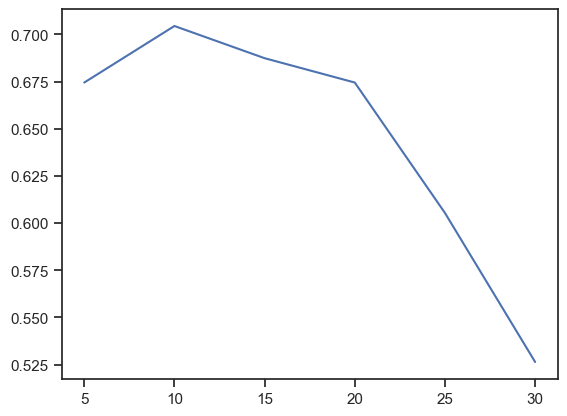

In [106]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

In [107]:
# Randomized Search

clf_rs = RandomizedSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='f1_macro')
clf_rs.fit(data_X_train, data_Y_train)

C:\Users\Yan note\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\Yan note\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30])}],
                   scoring='f1_macro')

In [108]:
clf_rs.best_score_, clf_rs.best_params_

(0.7044325609031491, {'n_neighbors': 10})

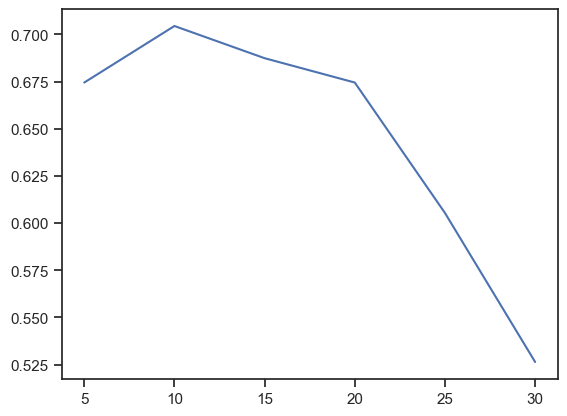

In [109]:
plt.plot(n_range, clf_rs.cv_results_['mean_test_score'])

In [110]:
clf_gs.best_estimator_.fit(data_X_train, data_Y_train)
target2_0 = clf_gs.best_estimator_.predict(data_X_train)
target2_1 = clf_gs.best_estimator_.predict(data_X_test)

In [111]:
# Новое качество модели
accuracy_score(data_Y_train, target2_0), accuracy_score(data_Y_test, target2_1)

(0.85, 0.8459119496855346)

In [112]:
# Качество модели до подбора гиперпараметров
accuracy_score(data_Y_train, target2_0), accuracy_score(data_Y_test, target2_1)

(0.85, 0.8459119496855346)

In [113]:
# Оценка качества
accuracy_score(data_Y_train, target2_0), accuracy_score(data_Y_test, target2_1)

(0.85, 0.8459119496855346)

In [114]:
confusion_matrix(data_Y_test, target2_1)

array([[  0,   2,   0,   0,   0],
       [  0, 152,   0,  12,   0],
       [  0,   1,   0,   0,   1],
       [  0,  11,   0,  44,  14],
       [  0,   0,   0,   8,  73]], dtype=int64)

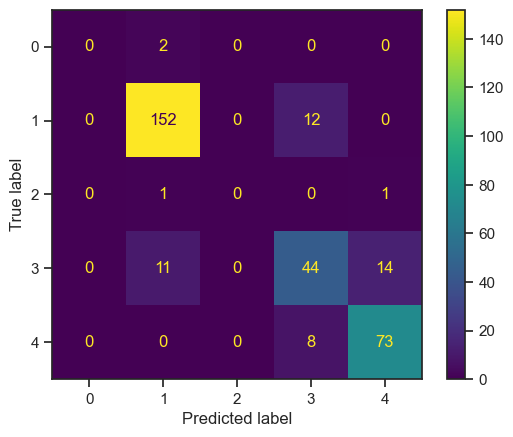

In [115]:
cm_display = ConfusionMatrixDisplay(confusion_matrix(data_Y_test, target2_1))
cm_display.plot()
plt.show()

In [116]:
# Параметры TP, TN, FP, FN считаются как сумма по всем классам
precision_score(data_Y_test, target2_1, average='micro')

0.8459119496855346

In [117]:
# Параметры TP, TN, FP, FN считаются отдельно для каждого класса 
# и берется среднее значение, дисбаланс классов не учитывается.
precision_score(data_Y_test, target2_1, average='macro')

C:\Users\Yan note\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.4865416210295728

In [118]:
classification_report(data_Y_test, target2_1, 
                      target_names=["0", "1", "2", "3", "5"], output_dict=True)

C:\Users\Yan note\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Yan note\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Yan note\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

{'0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2.0},
 '1': {'precision': 0.9156626506024096,
  'recall': 0.926829268292683,
  'f1-score': 0.9212121212121213,
  'support': 164.0},
 '2': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2.0},
 '3': {'precision': 0.6875,
  'recall': 0.6376811594202898,
  'f1-score': 0.6616541353383458,
  'support': 69.0},
 '5': {'precision': 0.8295454545454546,
  'recall': 0.9012345679012346,
  'f1-score': 0.863905325443787,
  'support': 81.0},
 'accuracy': 0.8459119496855346,
 'macro avg': {'precision': 0.4865416210295728,
  'recall': 0.4931489991228415,
  'f1-score': 0.48935431639885085,
  'support': 318.0},
 'weighted avg': {'precision': 0.8327023789842044,
  'recall': 0.8459119496855346,
  'f1-score': 0.838708347729813,
  'support': 318.0}}